# Machine Learning Capstone Project
## Project : Recognizing hardwritten digits

In this project we will discover the MNIST handwritten digit recognition problem and we will develop a deep learning model in Python using the Keras library that will be capable of achieving excellent results. Now some questions come to mind:
- What is deep learning ? 
- Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.
- Why we are using keras ?
- Keras is one of the best neural network Frameworks currently around. Here are the main advantages I see for it:
  - Simplicity (code itself is very good)
  - Awesome community - there is good documentation, lots of community code, it is also the framework of choice for many Kagglers nowadays meaning you can get a constant stream of some really insightful data science competition grade code written in keras.
  - Very active development.
- What is MNIST handwritten digit recognition problem ?
- The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset. Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. In this tutorial, we’ll give you a step by step walk-through of how to build a hand-written digit classifier using the MNIST dataset. For someone new to deep learning, this exercise is arguably the “Hello World” equivalent. It consists of 70,000 labeled 28x28 pixel grayscale images of hand-written digits. The dataset is split into 60,000 training images and 10,000 test images. There are 10 classes (one for each of the 10 digits). The task at hand is to train a model using the 60,000 training images and subsequently test its classification accuracy on the 10,000 test images.

### Let's Start

Let's start by importing numpy and setting a seed for the computer's pseudorandom number generator. This allows us to reproduce the results from our script:

In [4]:
# import numpy
import numpy as np

np.random.seed(10)  # for reproducibility

## Exploring the Data

### Load image data from MNIST.

In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The number of training and testing images present in the dataset
print('There are %d training images.' % len(X_train))
print('There are %d testing images.' % len(X_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step
There are 60000 training images.
There are 10000 testing images.


Let's look at some samples from the dataset:

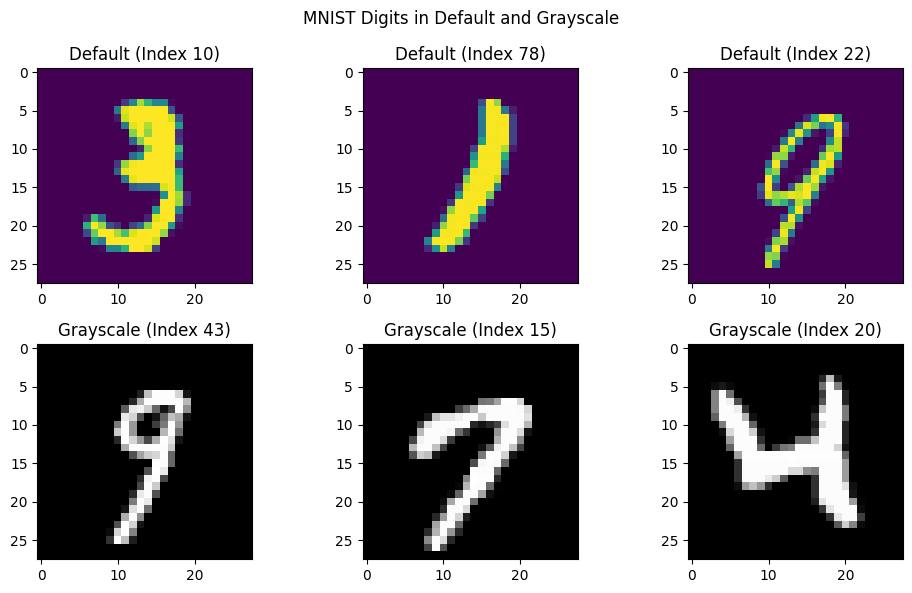

In [14]:
import matplotlib.pyplot as plt

# Assuming you have loaded the MNIST dataset using `mnist.load_data()` from Keras
# (replace with your actual data loading code if different)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a figure for better organization
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Adjust figsize for better visualization

# Plot images with clear and concise labeling
axes[0, 0].imshow(X_train[10], cmap='viridis')  # Default colormap
axes[0, 0].set_title('Default (Index 10)')
axes[0, 1].imshow(X_train[78], cmap='viridis')  # Default colormap
axes[0, 1].set_title('Default (Index 78)')
axes[0, 2].imshow(X_train[22], cmap='viridis')  # Default colormap
axes[0, 2].set_title('Default (Index 22)')
axes[1, 0].imshow(X_train[43], cmap='gray')  # Grayscale
axes[1, 0].set_title('Grayscale (Index 43)')
axes[1, 1].imshow(X_train[15], cmap='gray')  # Grayscale
axes[1, 1].set_title('Grayscale (Index 15)')
axes[1, 2].imshow(X_train[20], cmap='gray')  # Grayscale
axes[1, 2].set_title('Grayscale (Index 20)')

# Adjust layout (optional)
fig.suptitle('MNIST Digits in Default and Grayscale', fontsize=12)  # Add a main title
plt.tight_layout()

# Show the plot
plt.show()


We also need to take a look at dimensions of the input images from the dataset so that we can decide whether it needs preprocessing or not before getting it as input to the neural networks.

In [19]:
# printing shape of training dataset
print ('Shape of training dataset:') 
print (X_train.shape)

# printing shape of testing dataset
print ('Shape of testing dataset:')
print (X_test.shape)

Shape of training dataset:
(60000, 1, 28, 28)
Shape of testing dataset:
(10000, 1, 28, 28)


## **Preprocessing Data**

### Reshaping Dimesions
Now we will preprocess the inputs for keras. Our input is structured as a 3d array in the form of (60000, 28, 28), this means the height and depth of image is 28x28 and 60000 is number of images in the dataset. But input in keras requires 4d array. We must add a dimension for the depth of image. A full-color image with all 3 RGB channels will have a depth of 3, but MNIST images only have a depth of 1 and we can add this dimension easily using the **reshape()** function on the NumPy array.

In [26]:
# Reshape input data 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Printing the new dimensions
print('Dimensions after reshaping:')
print(X_train.shape)

Dimensions after reshaping:
(60000, 1, 28, 28)


### Normalize the Pixel values
Each of the pixels that represents an image stored inside a computer has a pixel value which describes how bright that pixel is, and/or what color it should be. In the simplest case of binary images, the pixel value is a 1-bit number indicating either foreground or background. For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. The most common  pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255 and this will normalize our data values to the range [0, 1].

In [29]:
# convert data type to float32 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing pixel values
X_train = X_train/255
X_test = X_test/255

### Preprocess class labels for Keras
This is a multi-class classification problem. The output variable is an integer from 0 to 9. Currently our labels is an array containing 10 classes and we need the labels to be in 10 distinct classes. We can fix this easily by using one hot encoding. There is a built-in **np_utils.to_categorical()** helper function in Keras.

In [33]:
from tensorflow import one_hot

Y_train = one_hot(y_train, 10)
Y_test = one_hot(y_test, 10)


## **Define model architecture**

The Keras layers module provides a high-level API that makes it easy to construct a neural network. It provides methods that facilitate the creation of dense (fully connected) layers and convolutional layers, adding activation functions, and applying dropout regularization. Here, we will learn how to use layers to build a convolutional neural network model to recognize the handwritten digits in the MNIST data set.
### **About CNN**
Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. Our aim of introducing more and more layers is increasing the depth of image and decreasing the height and depth of the image. More the depth, more patterns the model will learn within the image. 

In [50]:
# import necessary libraries for defining model architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first')  # Set the image data format to 'channels_first'

# Define model architecture
model = Sequential()
 
model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 26, 26)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 13, 13)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 11, 11)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Fit the Model

In [26]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## Evaluate model on test data

In [40]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

# Print model's metrics scores
print('Model Metrics Scores:')
print('Loss:', score[0])
print('Accuracy:', score[1])


NameError: name 'X_test' is not defined